#### Data analysis notebook

Reads in the data files and plot results



In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np


In [2]:
manager = RunManager("../run/rundb.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,fastSimulation,maxScatters,maxEnergy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,gamma,None,1. MeV,false,-999,-1.0 MeV,,/data/xenon/acolijn/G4FastSim/20240917_161721,std,10000,1,714114,settings.json,active


In [3]:
# cut on the global event variables
lxe = 0 # gaseous xenon


cut = lambda data: (data['ndet'][:,lxe] == 1 )
# additional cuts on the clusters
#cut_hit = lambda data: (data['r'] < 35.) & (data['zh'] < 0.) & (data['zh']>-60.) & (data['eh'] > 0.)
cut_hit = lambda data: (data['eh'] > 0.)

std = Geant4Analyzer("run_01", first_only=False)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Initialized Geant4Analyzer with run_id=run_01, label=
Loading data from ['/data/xenon/acolijn/G4FastSim/20240917_161721/std_0.root']
Loading /data/xenon/acolijn/G4FastSim/20240917_161721/std_0.root
Data loaded from 1 files
Data loaded from ['/data/xenon/acolijn/G4FastSim/20240917_161721/std_0.root']


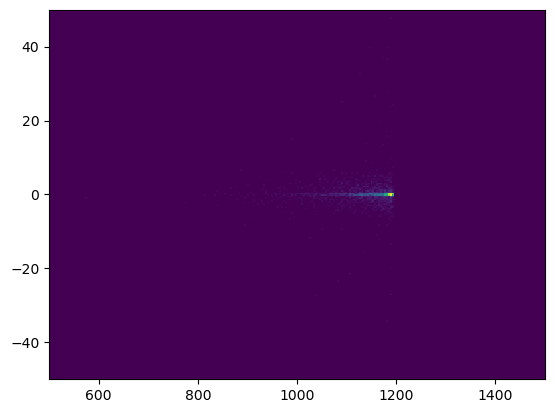

In [9]:
h = plt.hist2d(std.data['xh'], std.data['yh'], bins=250, range=[[500,1500],[-50,50]])

integral = 2522.0


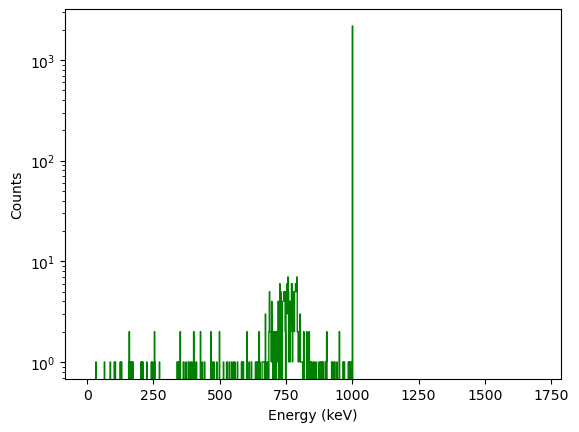

In [8]:
ax = std.plot_histogram("eh", bins=1000, range=(0, 1700), show=False)
ax.set_yscale('log')
plt.show()

Text(0, 0.5, 'z (mm)')

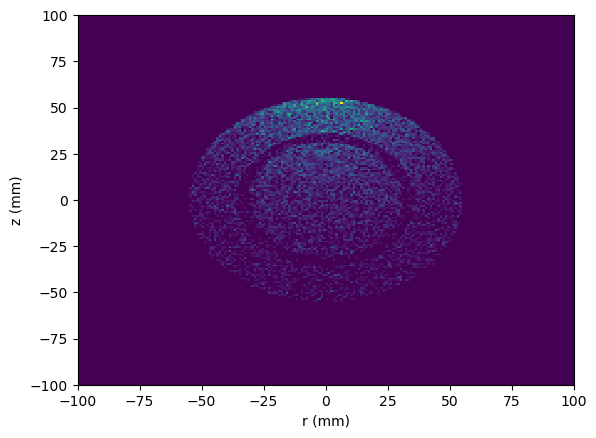

In [66]:
h2 = plt.hist2d(std.data['xh'][std.data['id']==1], std.data['yh'][std.data['id']==1], bins=200, range=((-100, 100), (-100, 100)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

Text(0, 0.5, 'z (mm)')

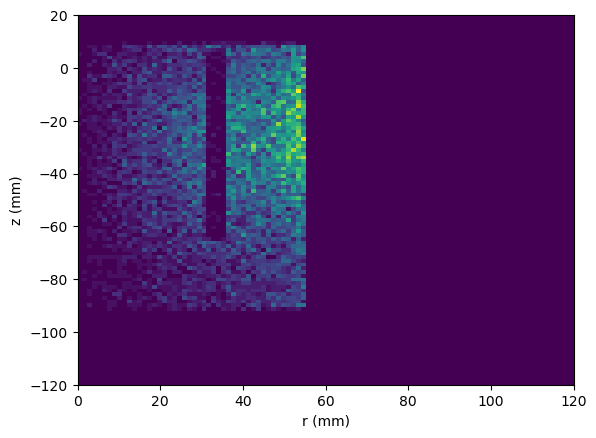

In [67]:
h2 = plt.hist2d(std.data['r'][std.data['id']==1], std.data['zh'][std.data['id']==1], bins=100, range=((0, 120), (-120, 20)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

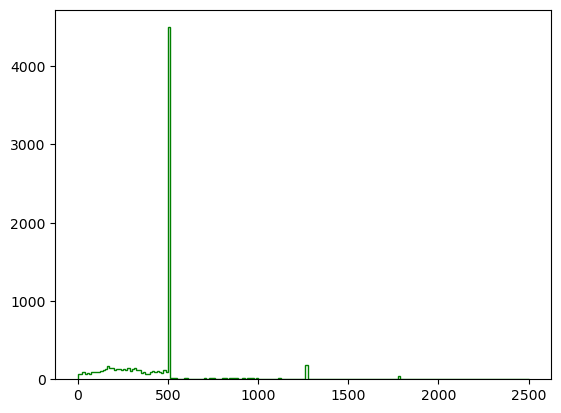

In [71]:
h = plt.hist(std.data['edet'][:,lxe], bins=200, range=(0, 2500), histtype='step')
plt.yscale('linear')